# The Ocean's Longest Diving Animals

How long can air-breathing animals hold their breath while diving? Which animals can stay submerged for the longest time?

The file `longest-diving-animals.csv` contains the recorded durations, in minutes, of the longest dives ever recorded in the scientific literature for different species of marine mammals. 

In [146]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'longest-diving-animals.csv'.

# from google.colab import files
# uploaded = files.upload()

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('longest-diving-animals.csv')
df.head()

,animal,category,duration
0,Emperor Penguin,penguins,32.2
1,King Penguin,penguins,9.2
2,Rockhopper Penguin,penguins,3.2
3,Macaroni Penguin,penguins,6.3
4,Royal Penguin,penguins,7.5


### Project Ideas

- Create horizontal bar plots to show the longest diving animals, either for each category or within a category.

- Follow the Pro Tips.

- Convert dive durations from minutes to hours for easier understanding - 2.5 hours is clearer than 150 minutes.

- Add a reference bar to help readers build intuition about the durations. 

Side Note: The longest time a person has held their breath underwater is 24 minutes 37 seconds. This was done at the surface of a pool, not while freediving, so it might not directly comparable.


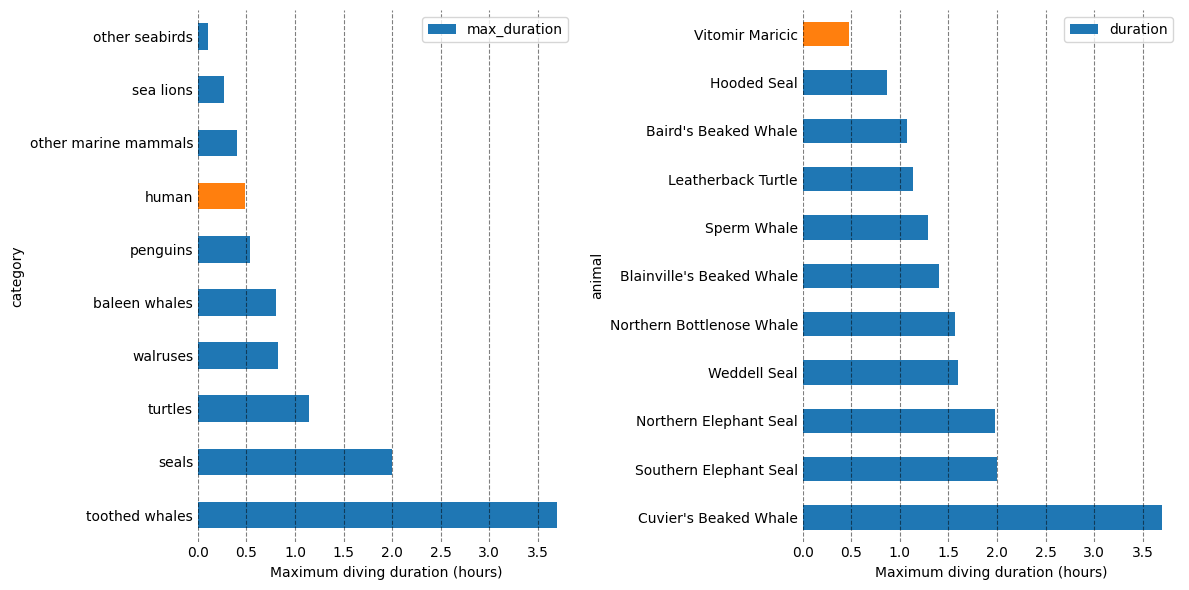

In [148]:
# Reference color for all animals
df['color'] = 'C0'

# Create category summary and add human reference
df_category = df.groupby('category', as_index=False)['duration'].max().rename(columns={'duration':'max_duration'})
# Add human reference row with correct columns
human_row = pd.DataFrame([{'category':'human','max_duration':29,'color':'C1'}])
df_category = pd.concat([df_category, human_row], ignore_index=True)
df_category['max_duration'] = (df_category['max_duration'] / 60).round(2)
df_category = df_category.sort_values(by='max_duration',ascending=False)

# Top 10 animals (without category), add human reference
df_without_category = df.sort_values('duration', ascending=False).head(10).copy()
human_row = pd.DataFrame([{'animal': 'Vitomir Maricic', 'category': 'human', 'duration': 29, 'color': 'C1'}])
df_without_category = pd.concat([df_without_category, human_row], ignore_index=True)
df_without_category['duration'] = (df_without_category['duration'] / 60).round(2)

def clean_bar_axes(ax):
    ax.spines[['top', 'bottom', 'left', 'right']].set_visible(False)
    ax.grid(axis='x', color='black', alpha=0.5, linestyle='--')
    ax.tick_params(axis='both', length=0)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Fill NaN colors with default 'C0'
df_category['color'] = df_category['color'].fillna('C0')
# Plot for categories
df_category.plot.barh(x='category', y='max_duration', ax=ax[0], color=df_category['color'].tolist())
ax[0].set_xlabel('Maximum diving duration (hours)')
clean_bar_axes(ax[0])

# Plot for top animals
df_without_category.plot.barh(x='animal', y='duration', ax=ax[1], color=df_without_category['color'])
ax[1].set_xlabel('Maximum diving duration (hours)')
clean_bar_axes(ax[1])

plt.tight_layout()
plt.show()